# Multiclass Classification:
This notebook is an introduction and tutorial to model building for multiclass classification on MNIST digits dataset preloaded in keras library. More specifically, we will build neural networks to recognize handwritten digits (0 - 9). We will build two types of models:

1. Fully Connected Neural Network (Containing all dense layers)
2. Convolutional Neural Network (Containing Conv-Maxpool-Dense combination)

We will see and compare the performances of both models. 
Moreover, this notebook also uses VGG19 model pretrained on imagenet dataset and fine tune it on our digits dataset. So, we will also compare its results with our CNN.


. This notebook walks you through dataset preparation, model development, model training and finally model evaluation using keras deep learning library.



In [0]:
import os
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
import collections
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Activation,Flatten,Dense
from keras.layers.convolutional import MaxPooling2D, Conv2D

Using TensorFlow backend.


In [0]:

def create_directory(path):
  if(os.path.exists(path)):
    return 
  os.mkdir(path)

## Dataset Preparation
This time, we will use in-built dataset library of keras to load MNIST dataset. We have ten classes in our dataset, (0 - 9), one for each digit

### Dataset Loading
We have 60,000 images in training set and 10000 images in test set. Number of instances in each class are almost same. Since, we already have test and train split, we will split train data into train and validation split. 
Our inputs are grayscale images of 28 x 28 dimension and outputs are labels (digit in the image). We need to normalize those images and reshape them to match the required input shape for keras model. This isn't a very large dataset, so it can fit into memory.

In [0]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training set size: ',len(x_train))
print('Test set size: ',len(x_test))

distributions=[collections.Counter(y_train),collections.Counter(y_test)]

for it,p in enumerate(['Training set distribution','Testing set distribution']):
  print(p)
  for i in range(0,9):
    print('Digit: ',i,' | Frequency: ',distributions[it][i])
  print()

11493376/11490434 [==============================] - 0s 0us/step
Training set size:  60000
Test set size:  10000
Training set distribution
Digit:  0  | Frequency:  5923
Digit:  1  | Frequency:  6742
Digit:  2  | Frequency:  5958
Digit:  3  | Frequency:  6131
Digit:  4  | Frequency:  5842
Digit:  5  | Frequency:  5421
Digit:  6  | Frequency:  5918
Digit:  7  | Frequency:  6265
Digit:  8  | Frequency:  5851

Testing set distribution
Digit:  0  | Frequency:  980
Digit:  1  | Frequency:  1135
Digit:  2  | Frequency:  1032
Digit:  3  | Frequency:  1010
Digit:  4  | Frequency:  982
Digit:  5  | Frequency:  892
Digit:  6  | Frequency:  958
Digit:  7  | Frequency:  1028
Digit:  8  | Frequency:  974



### Train - Validation Split
We will further divide the train set into 90% train set and 10% validation set using sklearn library function



In [0]:
from sklearn.model_selection import train_test_split
# we will divide this train data into train data and validation data with 90 - 10 split:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=7)


### Dataset Preparation
We will prepare data to be used by Keras model. This includes reshaping data and normalizing the images. We can also use data augmentation which includes: random flip, shear, zoom or rotation.
We also need to convert labels to one-hot encoded form.

In [0]:
# Converting labels to one-hot encoded form
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)
y_val=to_categorical(y_val,num_classes=10)

# We will reshape the array so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val=x_val.astype('float32')

# Normalizing images
x_train /= 255
x_val/=255
x_test /= 255


print('train set: ',x_train.shape)
print('val set: ',x_val.shape)
print('test set: ',x_test.shape)


### Dataset Visualization

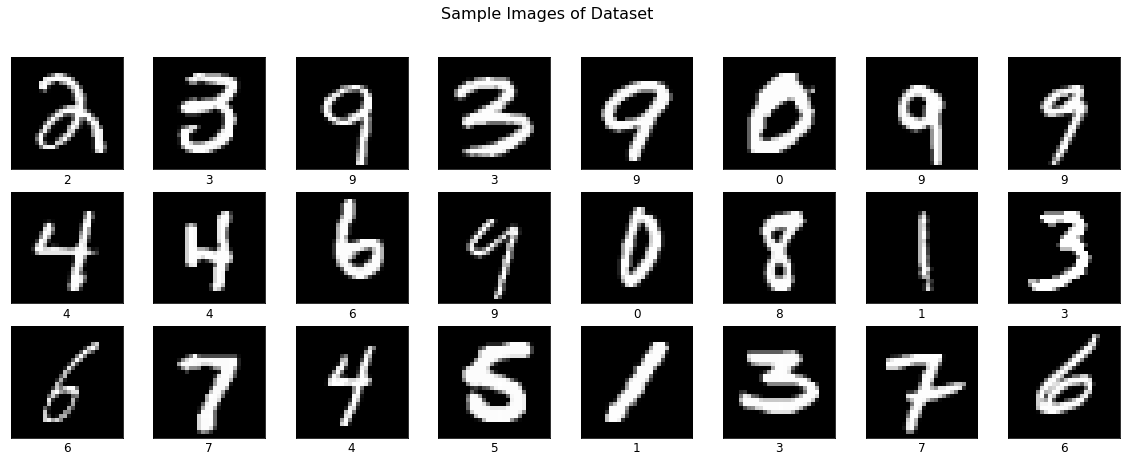

In [0]:

plt.figure(figsize=(20,7))
plt.suptitle('Sample Images of Dataset',fontsize=16)
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.xlabel(str(np.argmax(y_train[i])),fontsize=12)
plt.show()

## Building Fully Connected Neural Network
First, we will build a fully connected neural network. Our images are 28 x 28 dimension. This means, that we can use a fully connected neural network and feed those pixels in a long **28 x 28 = 784** vector to our neural network.
It has already been explained in theoretical part on how to choose the number of layers or neurons per layer to use for different problems. In this model, we will use a 3 layered neural network:

In [0]:
def build_simple_NN_model(inputshape):
  model=Sequential()
  
  model.add(Flatten(input_shape=inputshape))                                 # To flatten the input image of 28 x 28 dimensions
  
  model.add(Dense(128))                                                      # A dense layer of 128 neurons
  model.add(Activation('relu'))
  
  model.add(Dense(64))                                                       # A dense layer of 64 neurons
  model.add(Activation('relu'))
  
  model.add(Dense(10))                                                       # A dense layer of 10 neurons representing our 10 classes
  model.add(Activation('softmax'))
  
  return model

### Model Summary:
This will show the details of the model that we have just built here. It shows different layers of the model, their number of parameters and output shape of each layer. We need to provide input shape of our images

In [0]:
build_simple_NN_model(inputshape=(28,28,1)).summary()

W0617 15:55:42.852184 140062600333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 15:55:42.896030 140062600333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 15:55:42.925444 140062600333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 15:55:42.946271 140062600333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0617 15:55:42.959138 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

## Building Convolutional Neural Network
Now, we will build a convolutional neural network. We can use any predefined CNN architecture e.g. AlexNet, LeNet, VGG etc. but for our understanding, we will build a simple convolutional network that can learn the patterns to differentiate between different digits. We will use the same model as we used in binary classification and will make change in last layer as we need 10 neurons in last layer to classify 10 digits.

In [0]:
def build_CNN_model(inputshape):
  model=Sequential()

  model.add(Conv2D(64,(3,3),input_shape=inputshape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=2,strides=2))
  
  model.add(Conv2D(64,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=2,strides=2))
  
  
  model.add(Conv2D(32,(3,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=2,strides=2))
  
  #this will convert all the pixels of image to flat tensor
  model.add(Flatten())

  #add some fully connected layers
  model.add(Dense(1024))
  model.add(Activation('relu'))
  
  
  #a fully connected layer with 10 neurons that represent our 10 classes (one for each digit)
  model.add(Dense(10))

  #Softmax activation to get probability of each class
  model.add(Activation('softmax'))
  return model


### Model Summary:

In [0]:
build_CNN_model(inputshape=(28,28,1)).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_18 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          18464     
__________

## Training
We will configure some parameters for training. We will train our model for 50 epochs and with batchsize = 64

In [0]:
batchsize=64
epochs=50
nnweightsdir='nncheckpoints/'
cnnweightsdir='cnncheckpoints/'
logdir='logs/'

#save model weights after every 5 epochs.
saveafter=5
create_directory(nnweightsdir)
create_directory(cnnweightsdir)
create_directory(logdir)


**Checkpoint**: The model weights will be stored after 5 epoch(defined by saveafter variable above). This will allow us to retrieve the model weights later, for further training or model evaluation.

In [0]:
nn_checkpoints=keras.callbacks.ModelCheckpoint(os.path.join(nnweightsdir,"weights.{epoch:02d}-{val_loss:.2f}.hdf5"), monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=saveafter)
cnn_checkpoints=keras.callbacks.ModelCheckpoint(os.path.join(cnnweightsdir,"weights.{epoch:02d}-{val_loss:.2f}.hdf5"), monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=saveafter)
checkpoints=[nn_checkpoints,cnn_checkpoints]

### Training Fully Connected Neural Network and CNN models:

For multiclass classification, we will use **categorical cross entropy loss** and  **rmsprop** optimizer to train our models. In the cell below, we will trian both models (Fully Connected and Convolutional)

In [0]:
model_titles=['Fully Connected Neural Network','Convolutional Neural Network']
model_outputs=[]
models=[build_simple_NN_model(inputshape=(28,28,1)),build_CNN_model(inputshape=(28,28,1))]
for it,model in enumerate(models):
  print('Training',model_titles[it])
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='rmsprop')
  model_outputs.append(model.fit(x=x_train,y=y_train, epochs=epochs,validation_data=(x_val, y_val),shuffle=True,callbacks=[checkpoints[it]],batch_size=batchsize))

Training Fully Connected Neural Network
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 11s 212us/step - loss: 0.2393 - acc: 0.9303 - val_loss: 0.1473 - val_acc: 0.9573
Epoch 2/50
54000/54000 [==============================] - 9s 175us/step - loss: 0.1189 - acc: 0.9668 - val_loss: 0.1230 - val_acc: 0.9682
Epoch 3/50
54000/54000 [==============================] - 10s 179us/step - loss: 0.0955 - acc: 0.9749 - val_loss: 0.1169 - val_acc: 0.9727
Epoch 4/50
54000/54000 [==============================] - 9s 171us/step - loss: 0.0873 - acc: 0.9784 - val_loss: 0.1189 - val_acc: 0.9745
Epoch 5/50
54000/54000 [==============================] - 9s 171us/step - loss: 0.0800 - acc: 0.9807 - val_loss: 0.1360 - val_acc: 0.9725
Epoch 6/50
54000/54000 [==============================] - 9s 173us/step - loss: 0.0735 - acc: 0.9837 - val_loss: 0.1684 - val_acc: 0.9673
Epoch 7/50
54000/54000 [==============================] - 9s 172us/step - loss: 0

In [0]:

def summarize_stats(history,title):
  # loss 
  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  plt.suptitle(title,fontsize=18)
  plt.title('Loss',fontsize=16)
  plt.plot(history.history['loss'], color='red', label='Train')
  plt.plot(history.history['val_loss'], color='blue', label='Test')
  plt.legend(loc='upper right')
  # accuracy
  plt.subplot(1,2,2)
  plt.title('Classification Accuracy',fontsize=16)
  plt.plot(history.history['acc'], color='red', label='Train')
  plt.plot(history.history['val_acc'], color='blue', label='Test')
  
  plt.legend(loc='lower right')
  plt.show()

for i in range(2):
  summarize_stats(model_outputs[i],model_titles[i])


## Testing

### Model Weights
The weights of each model have been stored as checkpoints in two directories: **nncheckpoints** and **cnncheckpoints**. We will list down those weight files here.

In [0]:
checkpoint_folders=['nncheckpoints','cnncheckpoints']
for f in checkpoint_folders:
  print(f,':')
  print(os.listdir(f))

nncheckpoints :
['weights.05-0.15.hdf5', 'weights.15-0.19.hdf5', 'weights.45-0.27.hdf5', 'weights.50-0.25.hdf5', 'weights.10-0.19.hdf5', 'weights.10-0.14.hdf5', 'weights.40-0.25.hdf5', 'weights.05-0.14.hdf5', 'weights.20-0.23.hdf5', 'weights.45-0.25.hdf5', 'weights.20-0.19.hdf5', 'weights.30-0.26.hdf5', 'weights.25-0.23.hdf5', 'weights.30-0.23.hdf5', 'weights.50-0.24.hdf5', 'weights.15-0.20.hdf5', 'weights.40-0.28.hdf5', 'weights.35-0.26.hdf5']
cnncheckpoints :
['weights.25-0.29.hdf5', 'weights.50-0.19.hdf5', 'weights.45-0.23.hdf5', 'weights.10-0.39.hdf5', 'weights.20-0.26.hdf5', 'weights.15-0.26.hdf5', 'weights.05-0.09.hdf5', 'weights.05-0.12.hdf5', 'weights.30-0.27.hdf5', 'weights.50-0.22.hdf5', 'weights.45-0.25.hdf5', 'weights.10-0.11.hdf5', 'weights.35-0.28.hdf5', 'weights.25-0.30.hdf5', 'weights.30-0.16.hdf5', 'weights.20-0.12.hdf5', 'weights.40-0.19.hdf5', 'weights.15-0.20.hdf5', 'weights.40-0.29.hdf5', 'weights.35-0.15.hdf5']


### Weight Loading
For our two models: fully connected and convolutional neural network, we will can load weights from the stored files and evaluate the models on our test data. For example, following two lines select last weight files in each of the directory.

In [0]:
#models[0] is neural network model while models[1] is convolutional model. You have to select the names of weight files that you want to load

models[0].load_weights(glob.glob('nncheckpoints/*')[-1])
models[1].load_weights(glob.glob('cnncheckpoints/*')[-1])

for it,model in enumerate(models):
  print(model_titles[it])
  test_loss, accuracy = model.evaluate(x_test,y_test, verbose=1)
  print('Evaluation loss: %.2f, Accuracy: %.2f' % (test_loss,accuracy * 100.0))

Fully Connected Neural Network
10000/10000 [==============================] - 0s 27us/step
Evaluation loss: 0.26, Accuracy: 97.66
Convolutional Neural Network
10000/10000 [==============================] - 4s 444us/step
Evaluation loss: 0.22, Accuracy: 98.59


As we can see, the convolutional neural networks performs a little better than a fully connected network. This is mainly because CNN is able to grasp the context and look for patterns which might not be easy in fully connected (flattened pixels) case.

### Visualizing Predictions

In [0]:
predictions=[]
for model in models:
  predictions.append(model.predict(x_test))
random_selection=np.random.choice(len(x_test),24)


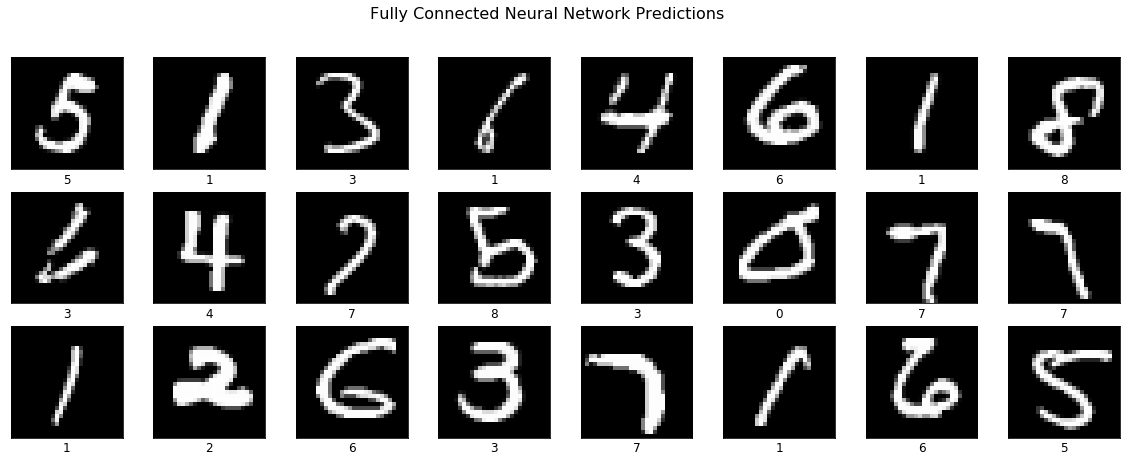

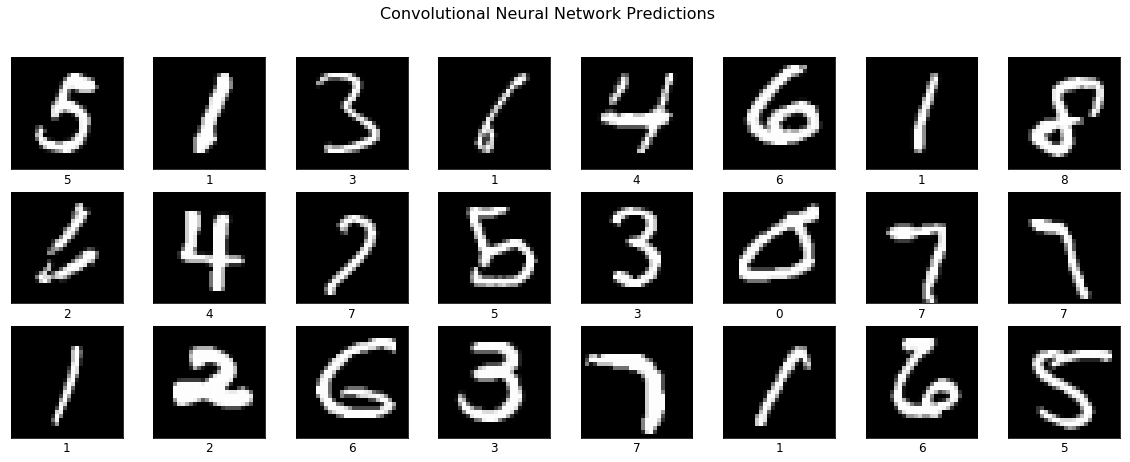

In [0]:
for it,prediction in enumerate(predictions):
  plt.figure(figsize=(20,7))
  plt.suptitle(model_titles[it]+str(' Predictions'),fontsize=16)
  for i in range(24):
      plt.subplot(3,8,i+1)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(x_test[random_selection[i]].squeeze(), cmap='gray')
      plt.xlabel(str(np.argmax(prediction[random_selection[i]])),fontsize=12)
  plt.show()

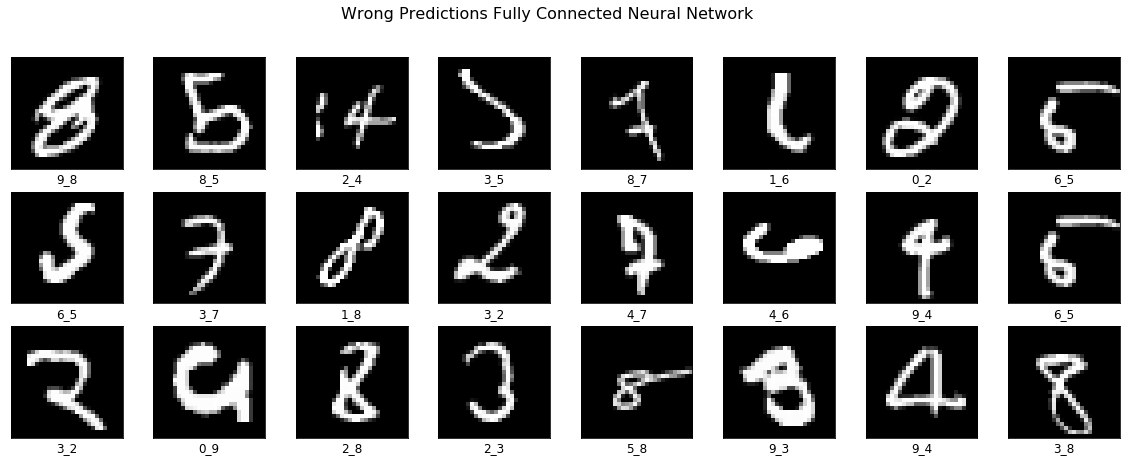

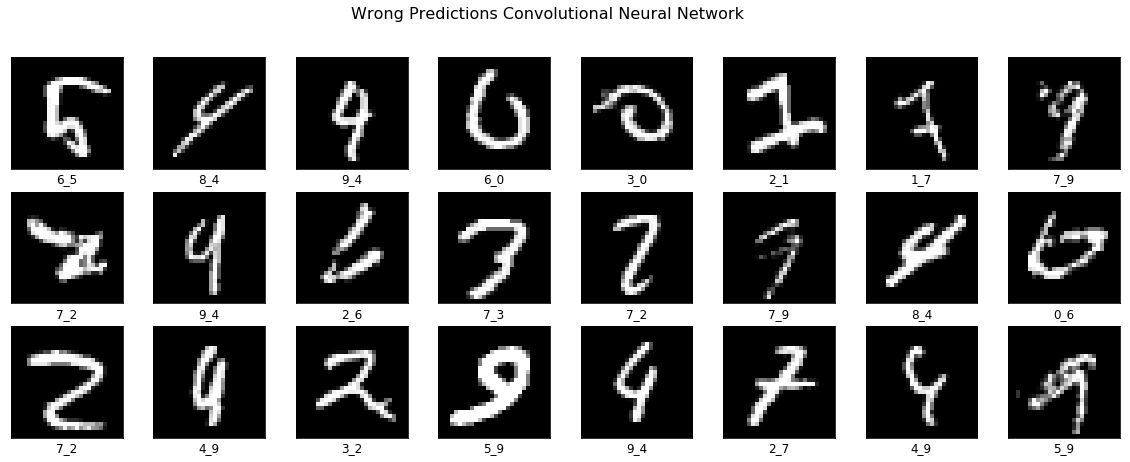

In [0]:
for it,prediction in enumerate(predictions):
  predicted=np.argmax(prediction,axis=1)
  actual=np.argmax(y_test,axis=1)
  indices=list(np.where(predicted!=actual))[0]

  random_selection=np.random.choice(len(indices),24)
  plt.figure(figsize=(20,7))
  plt.suptitle('Wrong Predictions '+str(model_titles[it]),fontsize=16)
  for i in range(24):
      plt.subplot(3,8,i+1)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(x_test[indices[random_selection[i]]].squeeze(), cmap='gray')
      plt.xlabel(str(np.argmax(prediction[indices[random_selection[i]]]))+str('_')+str(np.argmax(y_test[indices[random_selection[i]]])),fontsize=12)
  plt.show()


### Confusion Matrix:
Confusion matrix evaluates the model to see which classes have been mostly correctly classified and which classes are hard for the model to classify. The diagonal elements show for which the actual label of the image and model predicted label are same while off-diagonal elements show misclassified images. 

Fully Connected Neural Network : 
Accuracy Metrics for each digit:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Convolutional Neural Network : 
Accuracy Metrics for each digit:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980


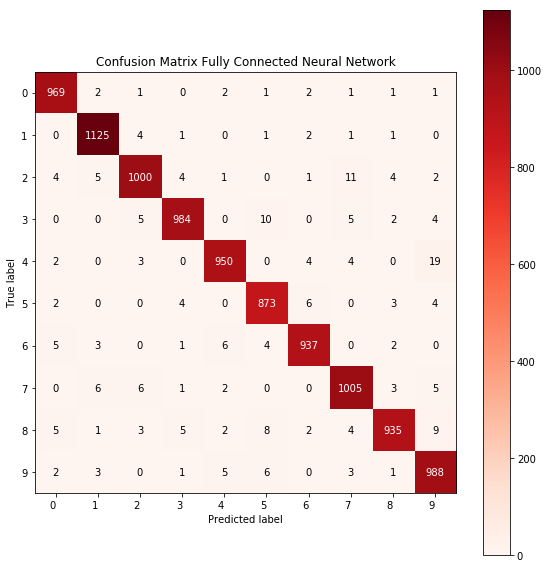

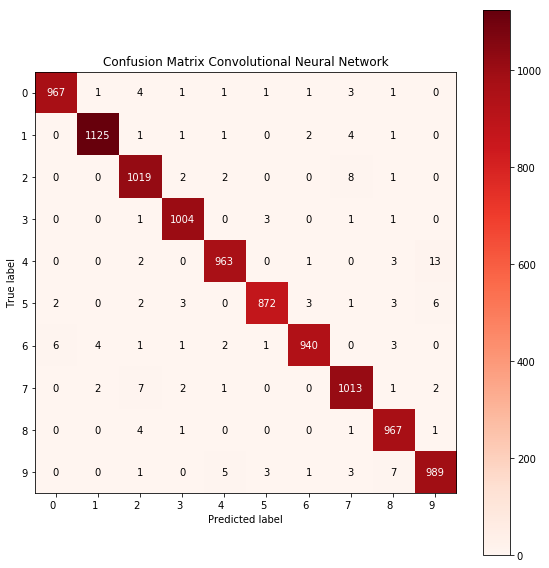

In [0]:
def plot_confusion_matrix(y_true, y_pred, titletxt,
                          cmap=plt.cm.Reds):
    
    cm = confusion_matrix(y_true, y_pred)
    classes = range(0,10)


    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix '+str(titletxt),
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  
for it,prediction in enumerate(predictions):
  predicted=np.argmax(prediction,axis=1)
  actual=np.argmax(y_test,axis=1)
  plot_confusion_matrix(actual,predicted,model_titles[it])
  print(model_titles[it],': \nAccuracy Metrics for each digit:')
  print(classification_report(actual,predicted))


# Fine Tuning Pretrained Model - VGG19
As we use finetuned VGG16 model for our binary class classification, we will use VGG19 for multiclass classification. As we know, four steps to fine tune a model are:

1. Load pretrained model and set include_top=False to remove last fully connected layers
2. Freeze initial layers because we do not want to train them
3. Build our own model on top of pretrained one.
4. Train the model

We will finetune VGG19 model for our problem. One important point to notice is that VGG19 takes an image with 3 channels and should be at least 32 x 32 (height x width). Since our images are 28 x 28 x 1, so we need to make some modifications to our input data. 

1. To solve height and width problem, we can simply resize the images using np.resize
2. Convert 1 channel image to 3 channel image. We can use the same one channel and replicate it in depth to make a 3 dimension image.



## Data Preparation

In [0]:
import cv2

def resize_and_add_channels(inputtensor):
  # First we will resize all images to 32 x 32
  newx_train=np.empty(shape=(len(inputtensor),32,32,1))
  for i in range(len(inputtensor)):
    newx_train[i,:,:,:]=np.expand_dims(cv2.resize(x_train[i,:,:,:],(32,32)),axis=2)

  # Now we will make one channel image to 3 channel image
  three_channel_imgs=np.tile(newx_train,(1,1,1,3))
  return three_channel_imgs

newx_train=resize_and_add_channels(x_train)
newx_test=resize_and_add_channels(x_test)
newx_val=resize_and_add_channels(x_val)
print('New X_train: ',newx_train.shape)
print('New x_val: ',newx_val.shape)
print('New X_test: ',newx_test.shape)


New X_train:  (54000, 32, 32, 3)
New x_val:  (6000, 32, 32, 3)
New X_test:  (10000, 32, 32, 3)


Now we have data in the form we want. We do not need to change anything from y_train, y_val or y_test because these are one-hot encoded vectors and do not need to be changed.

### Data Visualization
We can quickly visualize our data to verify that our images are in correct form for training

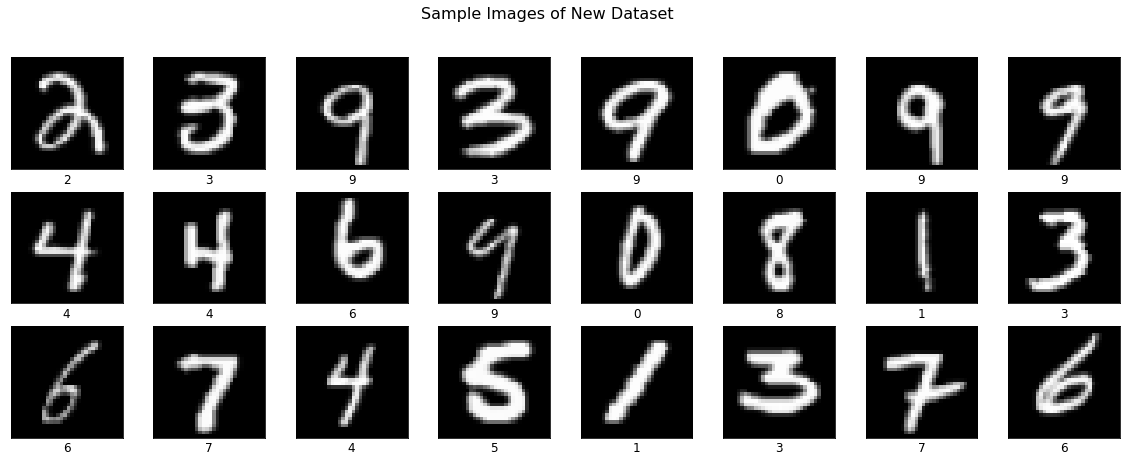

In [0]:

plt.figure(figsize=(20,7))
plt.suptitle('Sample Images of New Dataset',fontsize=16)
for i in range(24):
    plt.subplot(3,8,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(newx_train[i].squeeze(), cmap='gray')
    plt.xlabel(str(np.argmax(y_train[i])),fontsize=12)
plt.show()

## Loading Pretrained Model
We will remove the top 3 fully connected layers from VGG19 and will build our own model to classify 10 classes. 

In [0]:
from keras.applications import VGG19
vgg19=VGG19(weights='imagenet',input_shape=(32,32,3),include_top=False)
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

As we can see, VGG19 has more Convolutional layers in each block than VGG16. 

## Freezing the Initial Layers
The VGG19 model has 5 blocks and each block has Convolutional and Maxpooling layers. We will freeze the first 4 blocks and we will train the last block to learn features relevant to solve our classification problem. The last block contains 4 convolutional layers and 1 pool layer.

In [0]:
for layer in vgg19.layers[:-5]:
  layer.trainable=False

for layer in vgg19.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f4d08216ef0> False
<keras.layers.convolutional.Conv2D object at 0x7f4d08216f98> False
<keras.layers.convolutional.Conv2D object at 0x7f4d08742eb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4d0821a1d0> False
<keras.layers.convolutional.Conv2D object at 0x7f4d135fc748> False
<keras.layers.convolutional.Conv2D object at 0x7f4d13736208> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4d13751a20> False
<keras.layers.convolutional.Conv2D object at 0x7f4d13751e80> False
<keras.layers.convolutional.Conv2D object at 0x7f4d137625f8> False
<keras.layers.convolutional.Conv2D object at 0x7f4d1388a860> False
<keras.layers.convolutional.Conv2D object at 0x7f4d138a9240> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4d136c7b00> False
<keras.layers.convolutional.Conv2D object at 0x7f4d136c7160> False
<keras.layers.convolutional.Conv2D object at 0x7f4d136fc630> False
<keras.layers.convolutional.Conv2D object at 0x7f4d137e29b0>

## Build a model on top of base model

VGG19 model will act as our base model. Now, we will add our classifier on top of this base model. We will add the same last layers from our previous model for multiclass classification.

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout

def build_model_finetune(basemodel):
  model=Sequential()
  
  # Add base model
  model.add(basemodel)
  
  # To Flatten the pixel values of base model output tensor
  model.add(Flatten())

  #add some fully connected layers
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.25))
  
  # A fully connected layer with 10 neurons for 10 classes
  model.add(Dense(10))

  # Softmax to get probabilities of each class
  model.add(Activation('softmax'))
  
  return model


In [0]:
build_model_finetune(vgg19).summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_11 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              525312    
_________________________________________________________________
activation_29 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_30 (Activation)   (None, 512)               0         
__________

## Training the Model
As we trained our earlier model on two data iterators: with augmentation and without augmentation, we will do the same for this model too.

In [0]:
batchsize=32
epochs=10
nonaugweightsdir_ft='vgg19_nonaug_checkpoints/'
augweightsdir_ft='vgg19_aug_checkpoints/'
logdir='logs/'
categories=['Fine Tune Without Augmentation','Fine Tune With Augmentation']
saveafter=2

**Checkpoint**: The model weights will be stored after n epoch(n is defined by saveafter variable above). This will allow us to retrieve the model weights later, for further training or model evaluation.


In [0]:
nonaugcheckpoints=keras.callbacks.ModelCheckpoint(os.path.join(nonaugweightsdir_ft,"weights.{epoch:02d}-{val_loss:.2f}.hdf5"), monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=saveafter)
augcheckpoints=keras.callbacks.ModelCheckpoint(os.path.join(augweightsdir_ft,"weights.{epoch:02d}-{val_loss:.2f}.hdf5"), monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=saveafter)
checkpoints=[nonaugcheckpoints,augcheckpoints]

In [0]:
from keras.optimizers import RMSprop

models=[build_model_finetune(vgg19),build_model_finetune(vgg19)]
model_outputs=[]
for it,model in enumerate(models):
  print('\nTraining',categories[it])
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=RMSprop(lr=1e-6))
  model_outputs.append(model.fit(x=newx_train,y=y_train, epochs=epochs,validation_data=(newx_val, y_val),shuffle=True,callbacks=[checkpoints[it]],batch_size=batchsize))

### Visualizaing Training Loss and Accuracies

In [0]:
def summarize_stats(history,title):
  # loss 
  plt.figure(figsize=(18,4))
  plt.subplot(1,2,1)
  plt.suptitle(title,fontsize=18)
  plt.title('Loss',fontsize=16)
  plt.plot(history.history['loss'], color='red', label='Train')
  plt.plot(history.history['val_loss'], color='blue', label='Validation')
  plt.legend(loc='upper right')
  # accuracy
  plt.subplot(1,2,2)
  plt.title('Classification Accuracy',fontsize=16)
  plt.plot(history.history['acc'], color='red', label='Train')
  plt.plot(history.history['val_acc'], color='blue', label='Validation')
  
  plt.legend(loc='lower right')
  plt.show()
  
for it,model in enumerate(models):
  summarize_stats(model_outputs[it],title=str(categories[it]))


## Testing Pretrained Model


### Model Weights
The weights of the model were stored in **vgg_nonaug_checkpoints/** directory and **vgg_aug_checkpoints/** directory, after every 2 epochs. We will list down those weights files.

In [0]:
print('\nModel for Non Augmented Data: ')
print(os.listdir(nonaugweightsdir_ft))
print('\nModel for Augmented Data: ')
print(os.listdir(augweightsdir_ft))



Model for Non Augmented Data: 
['weights.06-0.59.hdf5', 'weights.02-0.64.hdf5', 'weights.03-0.63.hdf5', 'weights.01-0.65.hdf5', 'weights.07-0.57.hdf5', 'weights.05-0.60.hdf5', 'weights.09-0.54.hdf5', 'weights.04-0.62.hdf5', 'weights.08-0.55.hdf5', 'weights.10-0.52.hdf5']

Model for Augmented Data: 
['weights.03-0.61.hdf5', 'weights.04-0.63.hdf5', 'weights.07-0.61.hdf5', 'weights.06-0.61.hdf5', 'weights.08-0.58.hdf5', 'weights.09-0.53.hdf5', 'weights.01-0.65.hdf5', 'weights.05-0.64.hdf5', 'weights.02-0.67.hdf5', 'weights.10-0.63.hdf5']


### Weight Loading
For our convolutional model, we will load weights from file and evalute on test data. We can load  weight file stored in directory **vgg_nonaug_checkpoints/** or **vgg_aug_checkpoints/**

In [0]:

models[0].load_weights(glob.glob('vgg_nonaug_checkpoints/*')[-1])
models[1].load_weights(glob.glob('vgg_aug_checkpoints/*')[-2])

for it,model in enumerate(models):
  print(categories[it])
  test_loss, accuracy = model.evaluate_generator(testing_iterators[it],len(testing_iterators[it]), verbose=1)
  print('Testing loss: %.2f, Accuracy: %.2f' % (test_loss,accuracy * 100.0))


Fine Tune Without Augmentation
4/4 [==============================] - 51s 13s/step
Testing loss: 0.58, Accuracy: 71.00
Fine Tune With Augmentation
4/4 [==============================] - 55s 14s/step
Testing loss: 0.71, Accuracy: 49.00


### Visualizing Predictions

In [0]:
predictions=[]
for it,model in enumerate(models):
  print(categories[it])
  predictions.append(model.predict_generator(testing_iterators[it],len(testing_iterators[it])))
  
random_selection=np.random.choice(len(x_test),24)

Fine Tune Without Augmentation
Fine Tune With Augmentation


In [0]:
for it,prediction in enumerate(predictions):
  plt.figure(figsize=(20,7))
  plt.suptitle(str(categories[it])+' - CNN Model Predictions:',fontsize=16)
  for i in range(24):
      plt.subplot(3,8,i+1)
      plt.grid(False)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(cv2.imread(x_test[random_selection[i]]), cmap='gray')
      plt.xlabel(str(C2[np.argmax(prediction[random_selection[i]])]),fontsize=12)
  plt.show()

### Confusion Matrix:
Just as we used confusion matrix to see result stats in binary classification, CM will provide stats on correctly and incorrectly classified instances for our 10 classes.

In [0]:
def plot_confusion_matrix(y_true, y_pred, titletxt,
                          cmap=plt.cm.Reds):
    
    cm = confusion_matrix(y_true, y_pred)
    classes = range(0,2)

    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix ',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  

one_hot_y_test=to_categorical(y_test,num_classes=10)
print(one_hot_y_test.shape)
for it,prediction in enumerate(predictions):
  predicted=np.argmax(prediction,axis=1)
  actual=np.argmax(np.array(one_hot_y_test),axis=1)
  plot_confusion_matrix(actual,predicted,categories[it])
  print('\n',categories[it],'Accuracy Metrics for each class:')
  print(classification_report(actual,predicted))
